In [4]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image # PNG, JPEG 이미지 객체를 만드는 모델

import pandas as pd # 데이터를 구조화된 형식으로 가공 및 분석할 수 있는 자료구조 제공  
import numpy as np
import pydotplus
import os

In [11]:
tennis_data = pd.read_csv('play_tennis.csv')
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


Tennis를 칠 수 있을지 없을지 의사결정트리로 분류

모두 명목변수로 되어있는데, 수치값으로 변환한다.

In [13]:
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)

tennis_data.Temperature = tennis_data.Temperature.replace('Hot', 3)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild', 4)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool', 5)

tennis_data.Humidity = tennis_data.Humidity.replace('High', 6)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal', 7)

tennis_data.Wind = tennis_data.Wind.replace('Weak', 8)
tennis_data.Wind = tennis_data.Wind.replace('Strong', 9)

tennis_data.Temperature = tennis_data.Temperature.replace('No', 10)
tennis_data.Temperature = tennis_data.Temperature.replace('Yes', 11)

tennis_data


,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,3,6,8,No
1,0,3,6,9,No
2,1,3,6,8,Yes
3,2,4,6,8,Yes
4,2,5,7,8,Yes
5,2,5,7,9,No
6,1,5,7,9,Yes
7,0,4,6,8,No
8,0,5,7,8,Yes
9,2,4,7,8,Yes


In [18]:
# 1. 변수 tennis_data의 칼럼의 값들을 데이터프레임 형태로 추출하고
# np.array를 이용해 추출한 데이터를 배열 형태로 변환한 후 변수 X에 저장

# 2. 변수 tennis_data의 컬럼(PlayTennis)의 갑승ㄹ 데이터프레임 형태로 추출하고
# np.array를 이용해 추출한 데이터를 배열 형태로 변환한 후 변수 y에 저장

X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook', 'Temperature', 'Humidity', 'Wind'])) # 독립변수
y = np.array(pd.DataFrame(tennis_data, columns = ['PlayTennis'])) # target 값 (종속변수)

In [22]:
# 14개의 데이터(0~13) 일부를 train 데이터로, 일부를 test 데이터로 한다.
# 일반적으로 train을 7.5, test를 2.5로 둔다.
X_train, X_test, y_train, y_test = train_test_split(X, y)
    # X_train과 y_train에 75%
    # X_test과 y_test에 25%가 할당됨

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print(len(X_test)/(len(X_train)+len(X_test)))

10
4
10
4
0.2857142857142857


In [28]:
# 의사결정 트리 분류 모듈을 변수 dt_clf에 저장
# 의사결정 트리 분류 모듈이 저장된 변수 dt_clf의 함수 fit()에 
# 변수 X_train 과 y_train을 입력해 의사결정
# 트리분류모델 생성, 생성한 모델을 다시 변수 dt_clf에 저장한다.
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)

In [32]:
dt_prediciton = dt_clf.predict(X_test) # 약 4개 정도의 데이터를 이용해서 Y값을 구해본다.(각각)
    # 변수 dt_clf의 함수 predict()에 변수 X_test를 입력
    # 입력한 X_test에 대한 클래스 예측값을 변수 dt_prediction에 저장

array(['Yes', 'No', 'No', 'Yes'], dtype=object)

In [42]:
print(confusion_matrix(y_test, dt_prediciton))
# 출력결과
# [[ 2 0 ]
    [ 0 2 ]]

[[2 0]
 [0 2]]


In [44]:
# 성능측정
print(classification_report(y_test, dt_prediciton))

             precision    recall  f1-score   support

         No       1.00      1.00      1.00         2
        Yes       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00         4



In [61]:
from graphviz import Digraph

feature_names = tennis_data.columns.tolist()
feature_names = feature_names[0:4]
feature_names

['Outlook', 'Temperature', 'Humidity', 'Wind']

In [65]:
target_name = np.array(['Play No', 'Play Yes'])

![스크린샷, 2017-10-03 13-28-40](https://i.imgur.com/OMFmQhr.png)

In [66]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file=None, 
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

In [68]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
    # 결과물을 dt_graph에 넣는다.

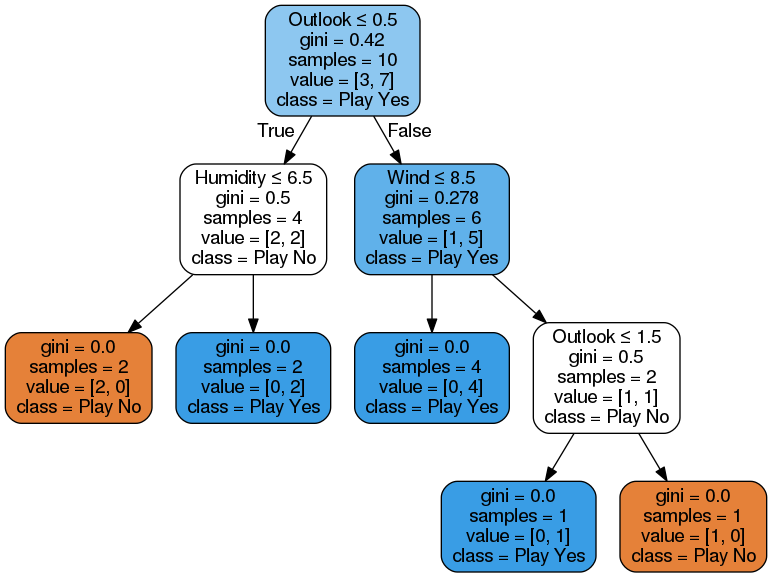

In [70]:
Image(dt_graph.create_png())

In [76]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score # 정확도 계산 모듈
import numpy as np
import pandas as pd

In [100]:
iris = load_iris()

# 150개 데이터 중에서 120개(70%)는 훈련용 set
# 30개는 테스트 set으로 활용

    # training_data
x_train = iris.data[:-30] # 마지막 30번째 값까지 선택(즉, 120개)
y_train = iris.target[:-30]

    # test_data 설정
x_test = iris.data[:30] # 30개 테스트 데이터
y_test = iris.target[:30]

print(y_train)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [101]:
# Random Forest 분류기 생성
# 분류, 회귀 및 이상 탐지를 위한 ensemble-based 방법 포함
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10)
rfc
    # n_estimators : 의사결정트리의 개수(default=10)
    # max_features : 최대 고려하는 feature의 개수(deafult=auto)
    # oob_score : out-of-bag(OOB) 사용여부(default=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [102]:
rfc.fit(x_train, y_train) # 훈련데이터를 입력해 분류기를 학습시킨다.
prediction = rfc.predict(x_test) # 테스트 데이터를 입력해 target_data를 예측한다.
print(prediction==y_test)

# Random forest 정확도 측정
rfc.score(x_test, y_test)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


1.0

In [104]:
# 정확도, 정밀도
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Accuracy : ", accuracy_score(prediction, y_test))
print("Classification Report : ", classification_report(prediction, y_test))

Accuracy :  1.0
Classification Report :               precision    recall  f1-score   support

          0       1.00      1.00      1.00        30

avg / total       1.00      1.00      1.00        30



In [115]:
# 성능제고 방법
from sklearn.model_selection import train_test_split
x=iris.data
y=iris.target
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2)
    # 데이터를 무작위로 혼합 후 x의 80%를 X_train, 20%를 X_test (feature)
    #                                          y의 80%를 Y_train, 20%를 Y_test (tratget)
print(y_test) # 앞에서 마지막 30개 데이터를 선택한 테스트 데이터 tratget값 
print(Y_test) # train_test_split()을 이용하여 생성한 테스트 데이터 target 값

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, Y_train)
prediction_1 = rfc.predict(X_test)
print("Accurac is : ", accuracy_score(prediction_1, Y_test))
print(classification_report(prediction_1, Y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 2 1 0 0 0 1 0 0 1 2 0 2 2 1 0 2 1 2 2 1 1 0 0 2 0 1 1 2 1]
Accurac is :  1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00        10
          2       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        30



In [118]:
clf_2 = RandomForestClassifier(n_estimators=200,
                            max_features = 4,
                            oob_score=True)
clf_2.fit(X_train, Y_train)
prediction_2 = clf_2.predict(X_test)
print("prediction_2 == Y_test : " , prediction_2 == Y_test)
print("Accurac is : ", accuracy_score(prediction_2, Y_test))
print(classification_report(prediction_2, Y_test))

TypeError: __init__() got an unexpected keyword argument 'obb_score'

In [123]:
# 각 feature의 중요도 확인
for feature, imp in zip(iris.feature_names, clf_2.feature_importances_):
    print(feature, imp)
    
    # petral width의 중요도가 가장 높다.

sepal length (cm) 0.0128881476863
sepal width (cm) 0.00605192102896
petal length (cm) 0.456630579527
petal width (cm) 0.524429351757
